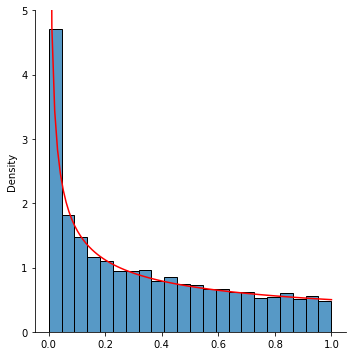

In [66]:
# 変数変換による確率密度関数の変化

# 確率変数Xの確率密度関数をfX(x)とし、Y=g(X)とする
# fY(y)=fX(g**-1(y))*|g'(g**-1(y))| となる
# f(x)/|g'(x)|のxがg(y)の逆関数に置き換わったものに該当する

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fX(x) = 1(0<=x<=1), 0(otherwise)で
# Y=X**2が従う確率密度関数fYを考えてみる
x = np.random.rand(10000)
y = x**2
sns.displot(y, kde=False, stat='density')

# X=g**-1(Y)=Y**(1/2)となる
# fY(y) = fX(y**(1/2))*|g'(y**(1/2))| = 1*|1/2*y**(-1/2)| = 1/(2*√y)
x2 = np.linspace(0.001, 1, 100)
y2 = 1 / (2*np.sqrt(x2))
plt.plot(x2, y2, color='red')
plt.ylim(0, 5)
plt.show()

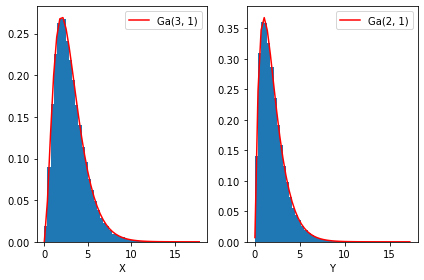

In [67]:
# 2変数(X,Y)の確率密度関数について考える
# 確率変数(X,Y)の確率密度関数をfX,Y(x,y)とし、X=h1(S,T), Y=h2(S,T)と表される時、
# (S,T)の確率密度関数fS,T(s,t)は
# fS,T(s,t) = fX,Y(h1(s,t), h2(s,t)|J(s,t)) となる
# この式中のJ(s,t)はヤコビアンといわれる

# X Yがガンマ分布に従い、S=X+Y, T=X/(X+Y)という変数変換を実行してみる

import scipy.special as sps

a = 3
b = 2
scale = 1
X = np.linspace(0, 20, 1000)
Y = np.linspace(0, 20, 1000)

# 乱数生成
x = np.random.gamma(a, 1, 100_000)
y = np.random.gamma(b, 1, 100_000)

fig, (ax1, ax2) = plt.subplots(1, 2)

# 変換前のガンマ関数をプロット
count, bins, ignored = ax1.hist(x, bins=50, density=True)
x_pdf = bins**(a-1)*(np.exp(-bins/scale)/(sps.gamma(a)*scale**a))
ax1.plot(bins, x_pdf, label=f"Ga({a}, 1)", c="r")

count, bins, ignored = ax2.hist(y, bins=50, density=True)
y_pdf = bins**(b-1)*(np.exp(-bins/scale)/(sps.gamma(b)*scale**b))
ax2.plot(bins, y_pdf, label=f"Ga({b}, 1)", c="r")

ax1.set_xlabel("X")
ax2.set_xlabel("Y")
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()


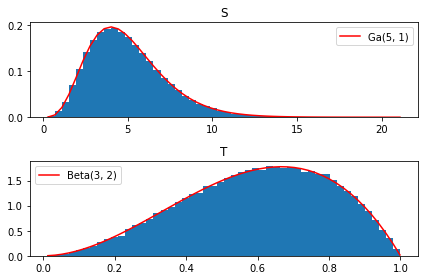

In [68]:
S = np.linspace(0, 20, 1000)
T = np.linspace(0, 20, 1000)

# 変数変換 Ga(5,1),Beta(3,2)に変換する
s = x + y
t = x / (x + y)

fig, (ax1, ax2) = plt.subplots(2, 1)

# 変換後のガンマ関数とベータ関数をプロット
count, bins, ignored = ax1.hist(s, bins=50, density=True)
s_shape = a+b
s_pdf = bins**(s_shape-1)*(np.exp(-bins/scale)/(sps.gamma(s_shape)*scale**(s_shape)))
ax1.plot(bins, s_pdf, label=f"Ga({a + b}, 1)", color="r")

from scipy.stats import beta
count, bins, ignored = ax2.hist(t, bins=50, density=True)
t_val = beta(a, b)
t_pdf = t_val.pdf(bins)
ax2.plot(bins, t_pdf, label=f"Beta({a}, {b})", color="r")

ax1.set_title("S")
ax2.set_title("T")
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show() # Ga(5,1),Beta(3,2)に従う

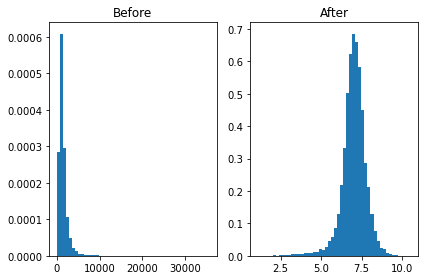

In [69]:
# データの変換

# 得られたデータを変換することで、さまざまな計算が可能になることがある
# 積が積み重なることにより得られるデータは対数を取ると正規分布に従う
# このような変換は対数変換と呼ばれる。人口、株価、所得のデータなどで用いられる

import pandas as pd

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
ch_df = pd.DataFrame(
    np.c_[data.data, data.target], 
    columns=data.feature_names + ["target"])

fig, (ax1, ax2) = plt.subplots(1, 2)

# 対数変換前
ax1.hist(ch_df["Population"], bins=50, density=True)

# 対数変換後
data_log = np.log(ch_df["Population"])
ax2.hist(data_log, bins=50, density=True)

ax1.set_title("Before")
ax2.set_title("After")

plt.tight_layout()
plt.show()

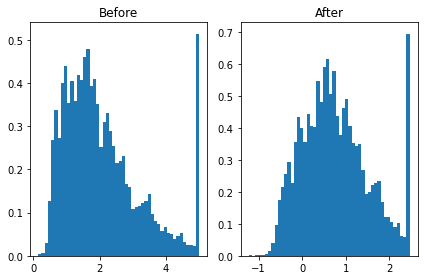

In [70]:
# データを正規分布に従わせる方法としては、べき乗変換もある
# べき乗変換と対数変換をひとまとめにした変換としてBox-Cox変換がある
# これはパラメータλに対して (x**λ-1)/λ (λ≠0)、logx (λ=0) の変換を行う
# 非負のデータしが変換できない点で注意が必要

from scipy.stats import boxcox

fig, (ax1, ax2) = plt.subplots(1, 2)

# Box-Cox変換前
ax1.hist(ch_df["target"], bins=50, density=True)

# Box-Cox変換後
data_boxcox = boxcox(ch_df["target"], lmbda=0.5)
ax2.hist(data_boxcox, bins=50, density=True)

ax1.set_title("Before")
ax2.set_title("After")

plt.tight_layout()
plt.show()

In [71]:
# そのほか、
# 確率pのように0〜1の値しか取らないデータを-∞〜∞に変換する
# ロジット変換、プロビット変換などがあるが、詳細は「18_質的回帰」を参照のこと